<a href="https://colab.research.google.com/github/leviaaf/KNN_SVM_IoTFireDetection_AccuracyTesting/blob/main/KNN_IoTFireDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('Training Dataset.csv')

In [3]:
dataset.head()

,Time,Api,Suhu,Kelembaban,PPM,Label
0,13:33:59,0,26.9,72,50.14,Tidak Kebakaran
1,13:34:03,0,26.8,72,50.89,Tidak Kebakaran
2,13:34:06,0,26.9,72,49.77,Tidak Kebakaran
3,13:34:10,0,26.9,72,51.64,Tidak Kebakaran
4,13:34:14,0,26.8,72,54.34,Tidak Kebakaran


In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
le=LabelEncoder()
dataset["Label"]=le.fit_transform(dataset["Label"])

In [6]:
dataset.head()

,Time,Api,Suhu,Kelembaban,PPM,Label
0,13:33:59,0,26.9,72,50.14,0
1,13:34:03,0,26.8,72,50.89,0
2,13:34:06,0,26.9,72,49.77,0
3,13:34:10,0,26.9,72,51.64,0
4,13:34:14,0,26.8,72,54.34,0


In [7]:
dataset = dataset.iloc[:,1:]
dataset.head()

,Api,Suhu,Kelembaban,PPM,Label
0,0,26.9,72,50.14,0
1,0,26.8,72,50.89,0
2,0,26.9,72,49.77,0
3,0,26.9,72,51.64,0
4,0,26.8,72,54.34,0


In [8]:
x=dataset.iloc[ : , :-1]
x.head()

,Api,Suhu,Kelembaban,PPM
0,0,26.9,72,50.14
1,0,26.8,72,50.89
2,0,26.9,72,49.77
3,0,26.9,72,51.64
4,0,26.8,72,54.34


In [9]:
y=dataset.iloc[ : ,-1]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Label, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [11]:
print(xtrain)

     Api  Suhu  Kelembaban     PPM
27     0  26.8          74   49.03
289    0  23.5          85   29.45
73     0  26.7          73  458.20
219    1  35.0          59  446.71
336    0  34.9          47  544.76
..   ...   ...         ...     ...
203    1  30.4          73  353.83
255    0  23.2          84    4.55
72     0  26.7          73  456.54
235    1  37.4          52  445.09
37     0  26.8          74   50.89

[296 rows x 4 columns]


In [12]:
print(xtest)

     Api  Suhu  Kelembaban     PPM
207    1  31.4          66  389.42
82     1  27.1          76  440.24
185    0  23.6          84   70.56
368    0  29.9          60  435.43
65     0  26.7          74   60.84
..   ...   ...         ...     ...
139    0  23.6          84   51.26
278    0  23.4          84   13.88
356    0  31.5          57  443.47
342    0  33.7          49  473.28
81     1  27.0          75  408.90

[75 rows x 4 columns]


In [13]:
from sklearn.preprocessing import Normalizer
normscaler = Normalizer()
xtrain = normscaler.fit_transform(xtrain)
xtest = normscaler.fit_transform(xtest)

In [14]:
print(xtrain)

[[0.         0.2890224  0.79804693 0.52876001]
 [0.         0.25275317 0.91421358 0.31674812]
 [0.         0.0574507  0.15707494 0.98591424]
 ...
 [0.         0.05765372 0.15763001 0.98581379]
 [0.00222382 0.08317092 0.11563871 0.98980066]
 [0.         0.28594851 0.78955932 0.54298208]]


In [15]:
print(xtest)

[[2.52384550e-03 7.92487487e-02 1.66573803e-01 9.82835914e-01]
 [2.23426639e-03 6.05486192e-02 1.69804246e-01 9.83613436e-01]
 [0.00000000e+00 2.10315013e-01 7.48578858e-01 6.28806241e-01]
 [0.00000000e+00 6.78681361e-02 1.36190240e-01 9.88355267e-01]
 [0.00000000e+00 2.68475358e-01 7.44089007e-01 6.11761827e-01]
 [0.00000000e+00 1.74722085e-02 2.57715075e-02 9.99515158e-01]
 [3.34381941e-04 1.12686714e-02 2.77537011e-02 9.99551218e-01]
 [0.00000000e+00 2.58619867e-01 9.39431140e-01 2.24910867e-01]
 [0.00000000e+00 2.51811446e-01 9.10807357e-01 3.27140572e-01]
 [9.30935603e-04 2.93244715e-02 7.63367194e-02 9.96650347e-01]
 [0.00000000e+00 1.51737693e-02 2.30822925e-02 9.99618409e-01]
 [0.00000000e+00 2.16728155e-01 7.80588694e-01 5.86268026e-01]
 [0.00000000e+00 2.37889881e-01 8.46726694e-01 4.75880562e-01]
 [0.00000000e+00 2.57174176e-01 9.30204468e-01 2.61879917e-01]
 [0.00000000e+00 2.96587502e-01 7.96802244e-01 5.26442816e-01]
 [0.00000000e+00 2.29133418e-01 8.15559622e-01 5.313759

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(xtrain,ytrain)
ypred=knn.predict(xtest)

In [18]:
accuracy=[]
for i in range(1,50):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    ypred=knn.predict(xtest)
    ac=accuracy_score(ytest,ypred)
    accuracy.append(ac)

In [19]:
print(accuracy)

[0.9066666666666666, 0.92, 0.8666666666666667, 0.88, 0.84, 0.8266666666666667, 0.8133333333333334, 0.8533333333333334, 0.8266666666666667, 0.84, 0.8266666666666667, 0.8266666666666667, 0.8133333333333334, 0.8133333333333334, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.7866666666666666, 0.8, 0.8, 0.7866666666666666, 0.7866666666666666, 0.7866666666666666, 0.8, 0.7866666666666666, 0.8, 0.8, 0.8, 0.8266666666666667, 0.7866666666666666, 0.7866666666666666, 0.7733333333333333, 0.7866666666666666, 0.7733333333333333, 0.76, 0.7733333333333333, 0.76, 0.7733333333333333]


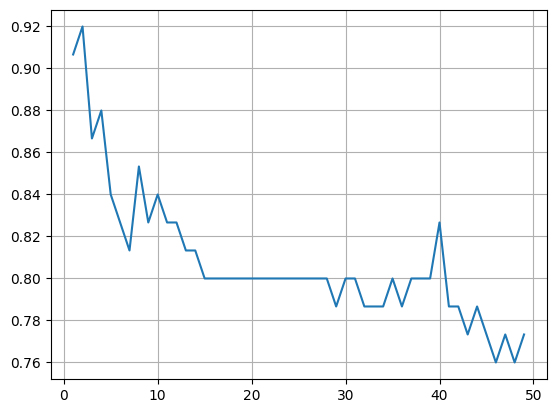

In [20]:
plt.plot(range(1,50),accuracy)
plt.grid(True)
plt.show()

In [21]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(xtrain,ytrain)
ypred=knn.predict(xtest)

In [22]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94        53
           1       0.90      0.82      0.86        22

    accuracy                           0.92        75
   macro avg       0.91      0.89      0.90        75
weighted avg       0.92      0.92      0.92        75



In [23]:
confusion_matrix(ytest,ypred)

array([[51,  2],
       [ 4, 18]])

In [24]:
accuracy_score(ytest,ypred)

0.92